In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [75]:
movies = pd.read_csv('movie_metadata.csv')
movies.head()
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [76]:
movies.dropna(how = 'any')
movies.drop(columns= 'color',inplace=True)
movies.drop_duplicates(inplace=True)


In [77]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 27 columns):
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-null object
num_user_for_reviews         4977 non-

In [78]:
#finding median budget per year
median_budget = movies.groupby('title_year')['budget'].median()/1e6

In [79]:
median_budget.tail()

title_year
2012.0    17.0
2013.0    20.0
2014.0    15.0
2015.0    15.0
2016.0    25.0
Name: budget, dtype: float64

In [80]:
#calculating median values for smoothness
median_rolling = median_budget.rolling(5).mean()
median_rolling.head()

title_year
1916.0         NaN
1920.0         NaN
1925.0         NaN
1927.0         NaN
1929.0    1.421981
Name: budget, dtype: float64

In [81]:
#converting years into array for plotting
years = median_budget.index.values
#converting budget values into array for plotting
med_budget = median_budget.values
med_budget_roll = median_rolling.values


In [82]:
years

array([1916., 1920., 1925., 1927., 1929., 1930., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

<IPython.core.display.Javascript object>


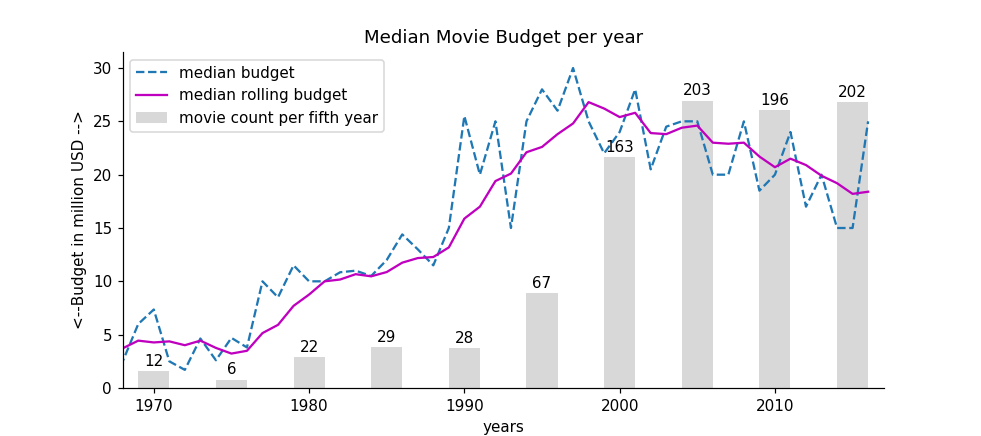

In [84]:
fig,ax1 = plt.subplots(nrows = 1,ncols=1,figsize = (9,4))
ax1.plot(years,med_budget,'--',label = 'median budget')
ax1.plot(years,median_rolling,'-m',label = 'median rolling budget')
ax1.set_title('Median Movie Budget per year')
ax1.set_ylabel('<--Budget in million USD -->')
ax1.set_xlabel('years')
#reoving spines to reduce clutter
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

In [11]:
movie_counts = movies.groupby('title_year')['budget'].count()
movie_counts.tail()

title_year
2012.0    195
2013.0    213
2014.0    226
2015.0    202
2016.0     91
Name: budget, dtype: int64

In [85]:
normalized_movie_counts = movie_counts/movie_counts.max()*median_budget.max()
normalized_movie_counts.tail()

title_year
2012.0    25.884956
2013.0    28.274336
2014.0    30.000000
2015.0    26.814159
2016.0    12.079646
Name: budget, dtype: float64

In [86]:
fifth_years = (years%5 == 0) & (years >= 1970)
movie_counts_5 = movie_counts[fifth_years]
movie_counts_5

title_year
1970.0     12
1975.0      6
1980.0     22
1985.0     29
1990.0     28
1995.0     67
2000.0    163
2005.0    203
2010.0    196
2015.0    202
Name: budget, dtype: int64

In [87]:
fifth_years = (years%5 == 0) & (years >= 1970)
years_5 = years[fifth_years]
years_5

array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
       2015.])

In [88]:

normalized_movie_counts_5 = normalized_movie_counts[years_5]


In [89]:
ax1.get_legend_handles_labels()

([<matplotlib.lines.Line2D at 0x7fc02ef010f0>,
 ['median budget', 'median rolling budget'])

In [90]:
ax1.bar(years_5,normalized_movie_counts_5.values,width = 2,facecolor = '.5',alpha = 0.3,label = 'movie count per fifth year')


<BarContainer object of 10 artists>

In [91]:
ax1.set_xlim(1968,2017)


(1968, 2017)

In [92]:
for x,y,v in zip(years_5,normalized_movie_counts_5,movie_counts_5):
    ax1.text(x,y + 0.5,str(v),ha = 'center')
ax1.legend()

<IPython.core.display.Javascript object>


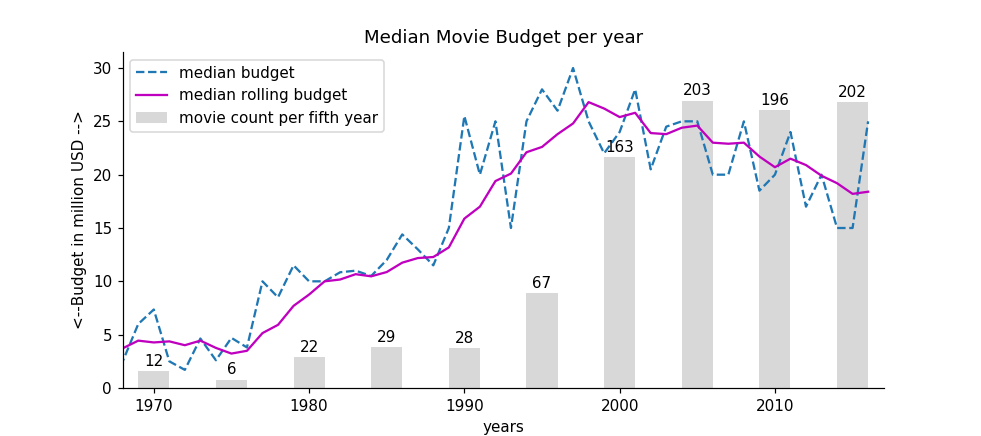

In [93]:
fig

In [21]:
ax1.tick_params(axis='x',which = 'minor',bottom = True)


In [94]:
#median of top ten movies per year

top_movies = movies.sort_values('budget',ascending=False).groupby('title_year')['budget'].apply(lambda x: x.iloc[:10].median())/1e6

In [95]:
top_movies.tail()

title_year
2012.0    214.5
2013.0    207.5
2014.0    179.0
2015.0    175.5
2016.0    176.5
Name: budget, dtype: float64

In [96]:
top_movies_rolling = top_movies.rolling(5).mean()
top_movies_rolling.tail()

title_year
2012.0    192.9
2013.0    197.4
2014.0    193.2
2015.0    188.3
2016.0    190.6
Name: budget, dtype: float64

<IPython.core.display.Javascript object>


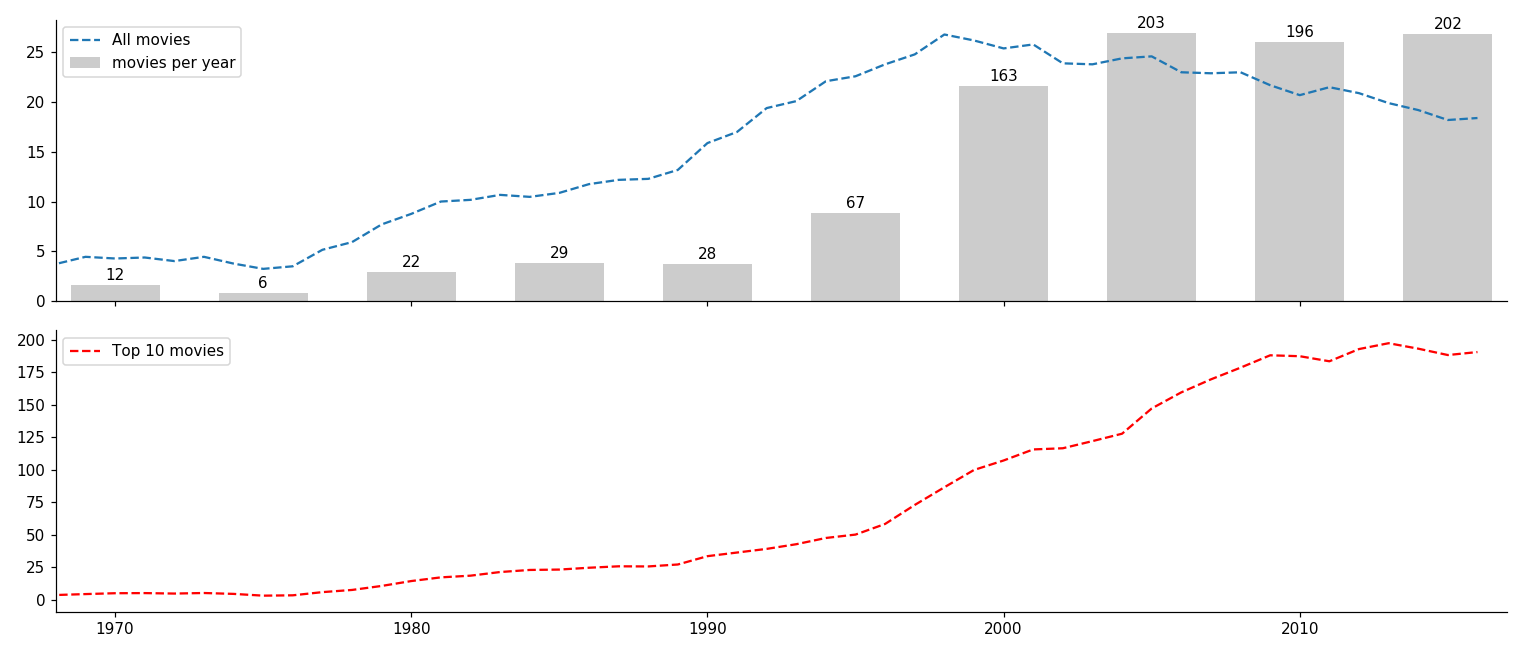

In [113]:
fig2,(ax2a,ax2b) = plt.subplots(nrows=2,ncols=1,figsize = (14,6),sharex=True)
ax2a.plot(years,median_rolling,'--',label = 'All movies')
ax2a.bar(years_5,normalized_movie_counts_5,3,label = 'movies per year',facecolor = '.8')
for x,y,v in zip(years_5,normalized_movie_counts_5,movie_counts_5):
    ax2a.text(x,y + 0.5,str(v),ha = 'center')
ax2a.legend()
ax2a.set_xlim(1968,2017)





ax2b.plot(years,top_movies_rolling,'--r',label = 'Top 10 movies')
ax2b.legend()
fig2.tight_layout()
ax2a.spines['right'].set_visible(False)
ax2a.spines['top'].set_visible(False)
ax2b.spines['right'].set_visible(False)
ax2b.spines['top'].set_visible(False)

In [123]:
type(movies['genres'].str.split('|')[0][0])

str